In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('data_v0.1.0.csv')
test = pd.read_csv('QADI_test_prepro_V0_1_0.csv')

In [4]:
df

,text,dialect
0,ياخي المدرب أختاره والمدرب دخله والمدرب بارك ا...,AE
1,شو الي قاعد يجري فالنصر يا أخوه خسر المباراة س...,AE
2,الي يبحث عن مشكلة الوصل راح يحصلها فالجولان,AE
3,انا مش معترض على تغير عامر الي دخل مكان عامر ا...,AE
4,تراجع مخيف في مستوى الحارس الكبير ماجد ناصر مش...,AE
...,...,...
365714,هل لك أن تسمح بالتقاط صورة لك معنا ؟,MSA
365715,هل لديك سمك مقلي ؟,MSA
365716,هل يمكنني استئجار مرشداً يتحدث اللغة اليابانية ؟,MSA
365717,أيهما تعتقد أنها أفضل كهدية لصبي عمره ثماني سن...,MSA


In [5]:
test

,tweet,country
0,ام لا لا ماشي حالو,PL
1,يا عم لو يحكولي سافر شالح حوافق بس سفروني,PL
2,قرار أقفال المحلات الساعة كان فيه فوائد اكثر م...,SA
3,عندنا بيسجلو مواد انساني عشان ترفعلهم ال ردت ف...,EG
4,يا فديت بنت اليمن وصوتها واله يجن ربي يحفظ هال...,YE
...,...,...
3498,ياستي ابوس ايدك ماتسوقيش صورتنا اكتر ماهي سيئه,EG
3499,ونعم فيكم يابو فيحان,SA
3500,مش عارف بس العيل لعيب بكل,LY
3501,بالضبط كدا الناس لازم تضغط اكتر علي المجلس الع...,SD


In [6]:
test.country.value_counts()

MSA    200
EG     200
SA     199
QA     198
SY     194
LB     194
YE     193
AE     192
KW     190
SD     188
BH     184
JO     180
IQ     178
MA     178
PL     173
DZ     170
OM     169
LY     169
TN     154
Name: country, dtype: int64

In [7]:
df.dialect.value_counts()

AE     20000
BH     20000
TN     20000
SY     20000
SA     20000
QA     20000
PL     20000
OM     20000
MA     20000
LY     20000
LB     20000
KW     20000
JO     20000
IQ     20000
EG     20000
DZ     20000
MSA    20000
SD     14481
YE     11238
Name: dialect, dtype: int64

In [9]:
pip install --upgrade arabic-reshaper

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

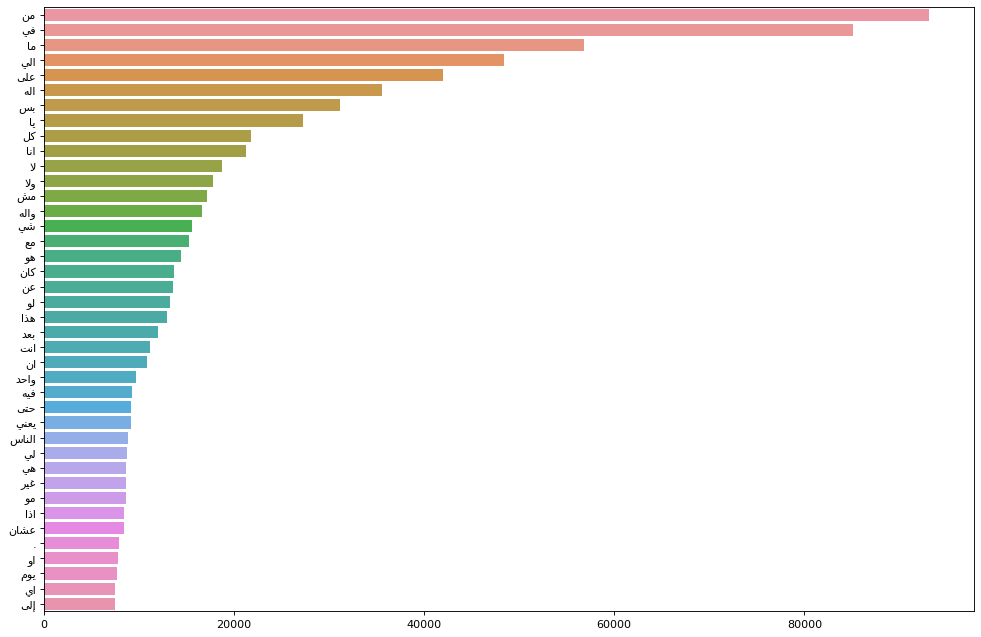

In [11]:
# most frequent words in the dataset

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from bidi import algorithm as bidialg
import arabic_reshaper


%matplotlib inline

all_words = ' '.join([text for text in df['text']])
all_words = all_words.split()

Counter = Counter(all_words)
most_common = Counter.most_common()
x, y = [], []
for word, count in most_common[:40]:
    word=bidialg.get_display(arabic_reshaper.reshape(word))
    x.append(word)
    y.append(count)

plt.figure(figsize=(15, 10), dpi=80)
sns.barplot(x=y,y=x)

In [12]:
df[df['text'].str.contains('اله')].dialect.value_counts()

SA     5784
QA     5572
AE     4908
KW     4812
JO     4515
OM     4039
BH     3985
LY     3722
PL     3581
DZ     3356
SY     3030
EG     2910
SD     2822
LB     2759
IQ     2746
MSA    2371
MA     2212
YE     1843
TN     1804
Name: dialect, dtype: int64

In [13]:
pip install ar_wordcloud


Note: you may need to restart the kernel to use updated packages.


downloading and unzipping arabic font: /opt/conda/lib/python3.7/site-packages/ar_wordcloud/fonts/NotoNaskhArabic-unhinted.zip .. 
downloading and unzipping arabic font: /opt/conda/lib/python3.7/site-packages/ar_wordcloud/fonts/NotoSansArabic-unhinted.zip .. 
downloading and unzipping arabic font: /opt/conda/lib/python3.7/site-packages/ar_wordcloud/fonts/NotoKufiArabic-unhinted.zip .. 


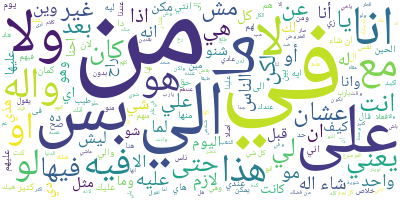

In [15]:
from ar_wordcloud import ArabicWordCloud

text = " ".join(i for i in df.text)
awc = ArabicWordCloud(background_color="white")
awc.from_text(text).to_image()

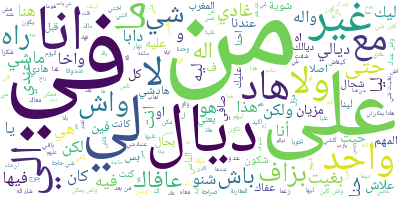

In [16]:
ma = " ".join(i for i in df.text.loc[df['dialect']=='MA'])
awc = ArabicWordCloud(background_color="white")
awc.from_text(ma).to_image()

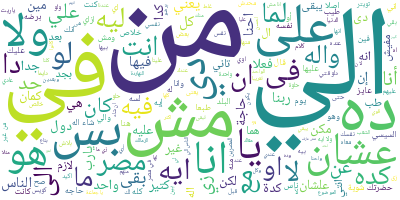

In [17]:
eg = " ".join(i for i in df.text.loc[df['dialect']=='EG'])
awc = ArabicWordCloud(background_color="white")
awc.from_text(eg).to_image()

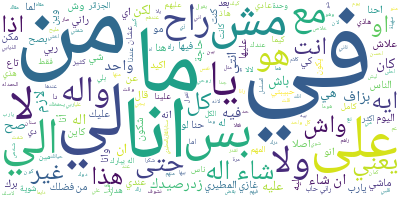

In [18]:
dz = " ".join(i for i in df.text.loc[df['dialect']=='DZ'])
awc = ArabicWordCloud(background_color="white")
awc.from_text(dz).to_image()

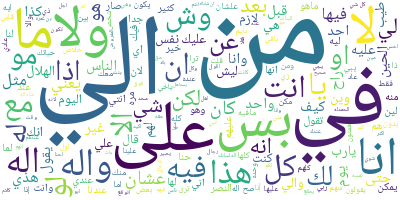

In [19]:
sa = " ".join(i for i in df.text.loc[df['dialect']=='SA'])
awc = ArabicWordCloud(background_color="white")
awc.from_text(sa).to_image()

In [10]:
def freq_words_removal(text, lst_words):
    lst_text = text.split()
    if lst_words is not None:
        lst_text = [word for word in lst_text if word not in lst_words]
    text = " ".join(lst_text)
    return text

In [11]:
wrds = ['مع','لا','على','من','ما','في','الي','هو','انا','أنا','اله']
df["text_clean"] = df["text"].apply(lambda x: freq_words_removal(x, wrds))
test["text_clean"] = test["tweet"].apply(lambda x: freq_words_removal(x, wrds))

In [12]:
df.head(5)

,text,dialect,text_clean
0,ياخي المدرب أختاره والمدرب دخله والمدرب بارك ا...,AE,ياخي المدرب أختاره والمدرب دخله والمدرب بارك ا...
1,شو الي قاعد يجري فالنصر يا أخوه خسر المباراة س...,AE,شو قاعد يجري فالنصر يا أخوه خسر المباراة سقطة ...
2,الي يبحث عن مشكلة الوصل راح يحصلها فالجولان,AE,يبحث عن مشكلة الوصل راح يحصلها فالجولان
3,انا مش معترض على تغير عامر الي دخل مكان عامر ا...,AE,مش معترض تغير عامر دخل مكان عامر المفترض ريان ...
4,تراجع مخيف في مستوى الحارس الكبير ماجد ناصر مش...,AE,تراجع مخيف مستوى الحارس الكبير ماجد ناصر مش ما...


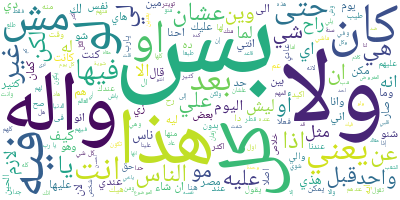

In [24]:
text = " ".join(i for i in df.text_clean)
awc = ArabicWordCloud(background_color="white")
awc.from_text(text).to_image()

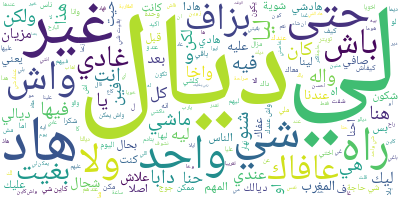

In [25]:
ma = " ".join(i for i in df.text_clean.loc[df['dialect']=='MA'])
awc = ArabicWordCloud(background_color="white")
awc.from_text(ma).to_image()

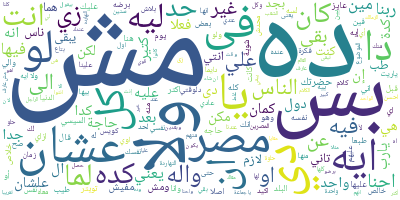

In [26]:
eg = " ".join(i for i in df.text_clean.loc[df['dialect']=='EG'])
awc = ArabicWordCloud(background_color="white")
awc.from_text(eg).to_image()

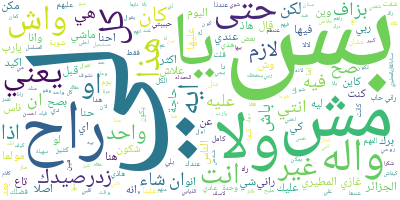

In [27]:
dz = " ".join(i for i in df.text_clean.loc[df['dialect']=='DZ'])
awc = ArabicWordCloud(background_color="white")
awc.from_text(dz).to_image()

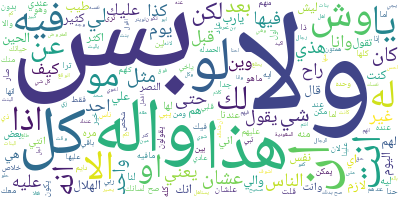

In [28]:
sa = " ".join(i for i in df.text_clean.loc[df['dialect']=='SA'])
awc = ArabicWordCloud(background_color="white")
awc.from_text(sa).to_image()

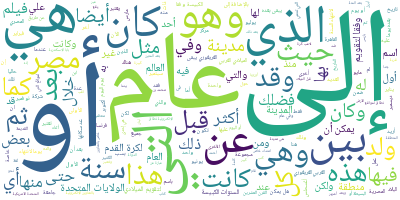

In [30]:
sa = " ".join(i for i in df.text_clean.loc[df['dialect']=='MSA'])
awc = ArabicWordCloud(background_color="white")
awc.from_text(sa).to_image()

<AxesSubplot:>

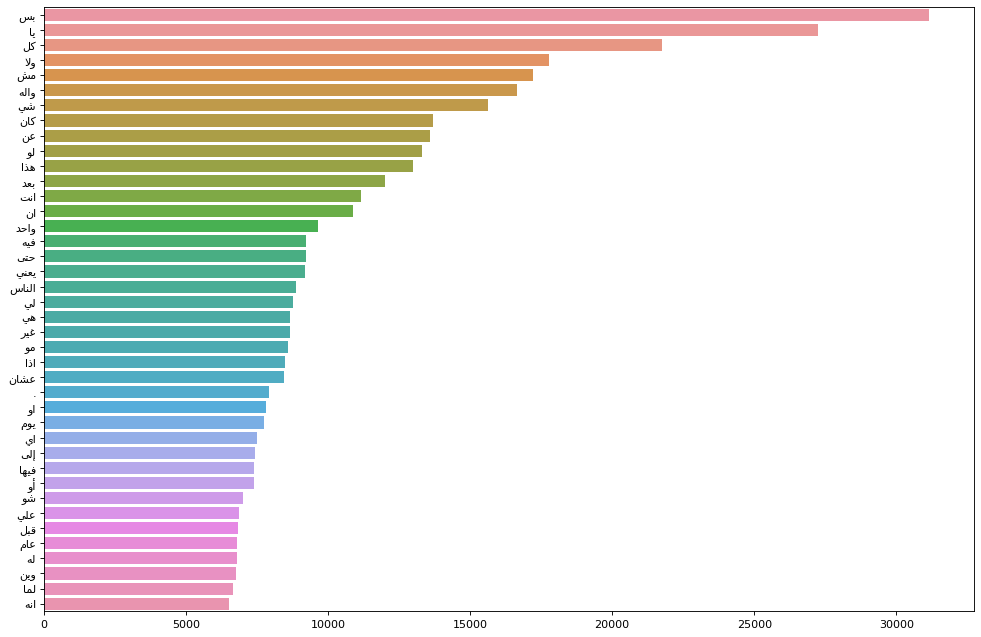

In [17]:
from collections import Counter

all_words = ' '.join([text for text in df['text_clean']])
all_words = all_words.split()

Counter = Counter(all_words)
most_common = Counter.most_common()
x, y = [], []
for word, count in most_common[:40]:
    word=bidialg.get_display(arabic_reshaper.reshape(word))
    x.append(word)
    y.append(count)

plt.figure(figsize=(15, 10), dpi=80)
sns.barplot(x=y,y=x)

## Modeling

In [13]:
from sklearn.model_selection import train_test_split

X_train = df['text_clean']
y_train = df['dialect']
X_test = test['text_clean']
y_test = test['country']
# Split into Training and Test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df['country'])

In [25]:
#y_train.value_counts()/y.value_counts()

AE    0.799990
BH    0.800000
DZ    0.799990
EG    0.800000
IQ    0.800026
JO    0.799990
KW    0.800000
LB    0.800000
LY    0.799980
MA    0.800000
OM    0.800020
PL    0.800000
QA    0.800000
SA    0.799990
SD    0.800014
SY    0.800000
TN    0.800014
YE    0.799957
Name: country, dtype: float64

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = X_train
# Initizalize the vectorizer with max nr words and ngrams (1: single words, 2: two words in a row)
vectorizer_tfidf = TfidfVectorizer(ngram_range=(1,3))
# Fit the vectorizer to the training data
vectorizer_tfidf.fit(corpus)

TfidfVectorizer(ngram_range=(1, 3))

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

classifier_tfidf_NB = MultinomialNB()
model_tfidf_NB = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", classifier_tfidf_NB)])

model_tfidf_NB.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 3))),
                ('classifier', MultinomialNB())])

In [16]:
from sklearn.metrics import accuracy_score

predicted_train_tfidf_NB = model_tfidf_NB.predict(X_train)
accuracy_train_tfidf_NB = accuracy_score(y_train, predicted_train_tfidf_NB)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf_NB))

predicted_test_tfidf_NB = model_tfidf_NB.predict(X_test)
accuracy_test_tfidf_NB = accuracy_score(y_test, predicted_test_tfidf_NB)
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf_NB))

Accuracy Training data: 94.6%
Accuracy Test data: 75.9%


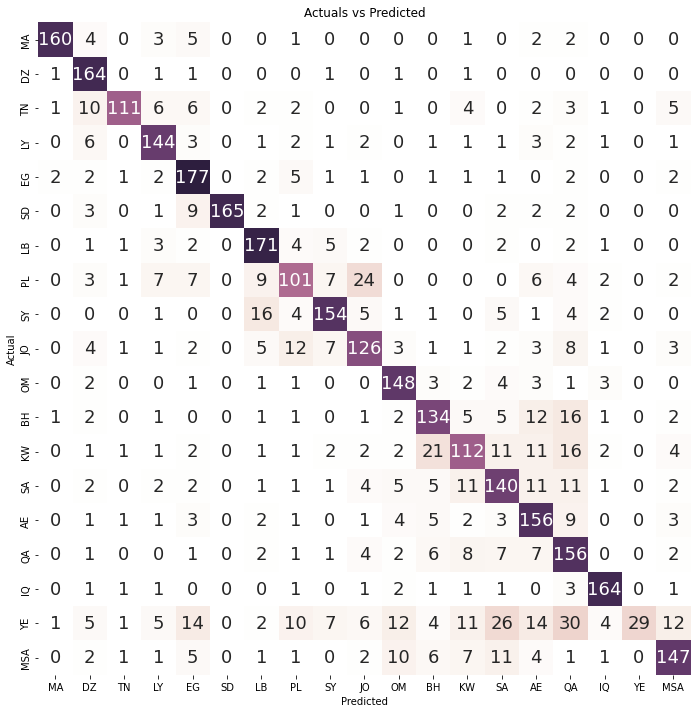

In [26]:
from sklearn.metrics import confusion_matrix

data = confusion_matrix(y_test, predicted_test_tfidf_NB,labels=["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"])
df_cm = pd.DataFrame(data, columns=["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"], index = ["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'


f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(df_cm, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size': 18})
plt.title('Actuals vs Predicted')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier_tfidf = LogisticRegression()
model_tfidf = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", classifier_tfidf)])

model_tfidf.fit(X_train, y_train)

In [ ]:
predicted_train_tfidf = model_tfidf.predict(X_train)
accuracy_train_tfidf = accuracy_score(y_train, predicted_train_tfidf)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf))

predicted_test_tfidf = model_tfidf.predict(X_test)
accuracy_test_tfidf = accuracy_score(y_test, predicted_test_tfidf)
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf))

In [ ]:
data = confusion_matrix(y_test, predicted_test_tfidf)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'


f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(df_cm, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size': 18})
plt.title('Actuals vs Predicted')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier


classifier_tfidf_RF = RandomForestClassifier(n_estimators=50)
model_tfidf_RF = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", classifier_tfidf_RF)])

model_tfidf_RF.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 3))),
                ('classifier', RandomForestClassifier(n_estimators=50))])

In [20]:
predicted_train_tfidf_RF = model_tfidf_RF.predict(X_train)
accuracy_train_tfidf_RF = accuracy_score(y_train, predicted_train_tfidf_RF)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf_RF))

predicted_test_tfidf_RF = model_tfidf_RF.predict(X_test)
accuracy_test_tfidf_RF = accuracy_score(y_test, predicted_test_tfidf_RF)
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf_RF))

Accuracy Training data: 99.8%
Accuracy Test data: 74.7%


In [25]:
from sklearn.metrics import f1_score
f1_score(y_test, predicted_test_tfidf_RF, average='macro')

0.7435345234113495

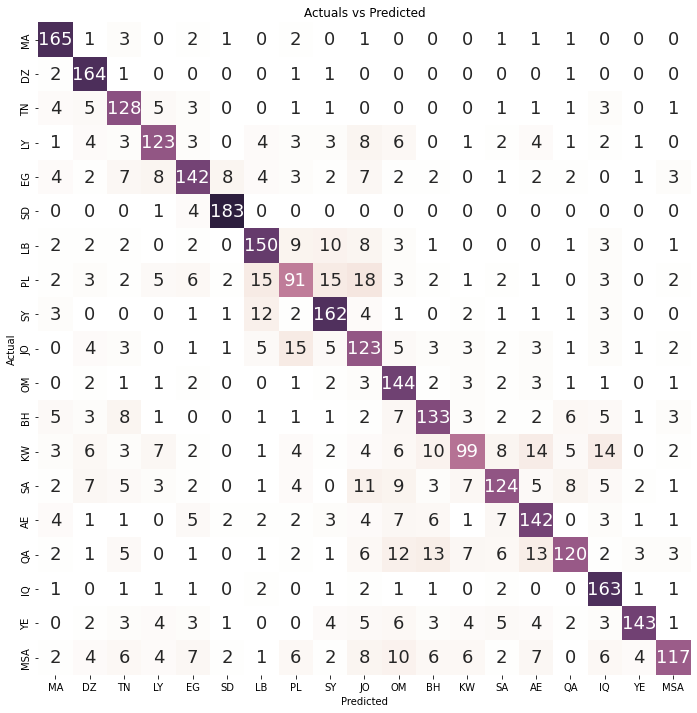

In [27]:

data = confusion_matrix(y_test, predicted_test_tfidf_RF,labels=["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"])
df_cm = pd.DataFrame(data, columns=["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"], index = ["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(df_cm, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size': 18})
plt.title('Actuals vs Predicted')
plt.show()

In [24]:
import pickle

saved_model = pickle.dump(model_tfidf_RF, open('RF.pkl', 'wb'))